In [ ]:
import pandas as pd
import numpy as np

from google.colab import drive 
drive.mount('/content/drive')

path = "/content/Cleandf.csv"

Cleandf=pd.read_csv(path)

Cleandf = Cleandf.drop('totChol', axis=1)
Cleandf = Cleandf.drop('cigsPerDay', axis=1)
Cleandf = Cleandf.drop('BMI', axis=1)
Cleandf = Cleandf.drop('heartRate', axis=1)
Cleandf = Cleandf.drop('BPMeds', axis=1)
Cleandf = Cleandf.drop('glucose', axis=1)
Cleandf = Cleandf.drop('newGlucose', axis=1)
Cleandf = Cleandf.drop('education', axis=1)
Cleandf = Cleandf.drop('selectedCase', axis=1)
Cleandf = Cleandf.drop('Unnamed: 0', axis=1)

Cleandf.tail()

Mounted at /content/drive


,male,age,currentSmoker,prevalentStroke,prevalentHyp,diabetes,sysBP,diaBP,TenYearCHD,totChol_1,cigsPerDay_1,BMI_1,heartRate_1,education_1,BPMeds_1,newGlucose_1
3271,1,68,1,0,0,0,109.0,73.0,0,250.0,10.0,24.68,72.0,2.0,0.0,66.0
3272,1,68,1,0,0,0,122.0,70.0,0,261.0,10.0,26.37,96.0,1.0,0.0,60.0
3273,1,68,1,0,0,0,145.0,67.0,1,193.0,15.0,23.13,75.0,1.0,0.0,72.0
3274,1,69,1,0,0,0,123.0,77.0,1,245.0,1.0,26.58,70.0,1.0,0.0,81.0
3275,1,69,1,0,1,0,151.0,74.0,0,232.0,4.0,24.14,75.0,1.0,0.0,62.0


In [ ]:
from sklearn.model_selection import train_test_split

#X = Cleandf.drop('TenYearCHD', axis = 1)
X = Cleandf.drop(['TenYearCHD','totChol_1','heartRate_1','diaBP','newGlucose_1','currentSmoker','diabetes','prevalentStroke','male'], axis=1)
y = Cleandf['TenYearCHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((2620, 7), (656, 7))

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)
y_predict = xgb_model.predict(X_test)

accuracy = accuracy_score(y_test, y_predict)
print('Accuracy:', accuracy)

Accuracy: 0.8384146341463414


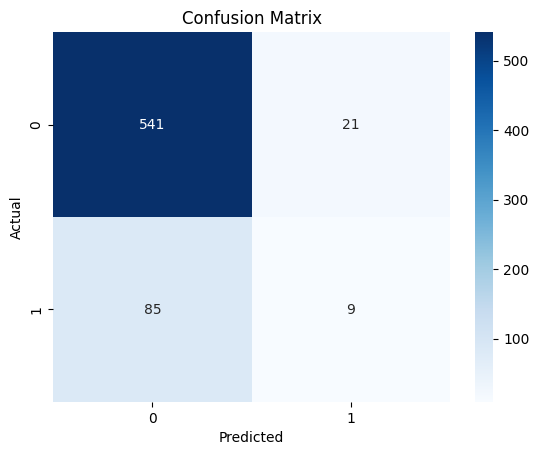

              precision    recall  f1-score   support

           0       0.86      0.96      0.91       562
           1       0.30      0.10      0.15        94

    accuracy                           0.84       656
   macro avg       0.58      0.53      0.53       656
weighted avg       0.78      0.84      0.80       656



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_predict)
cr = classification_report(y_test, y_predict)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

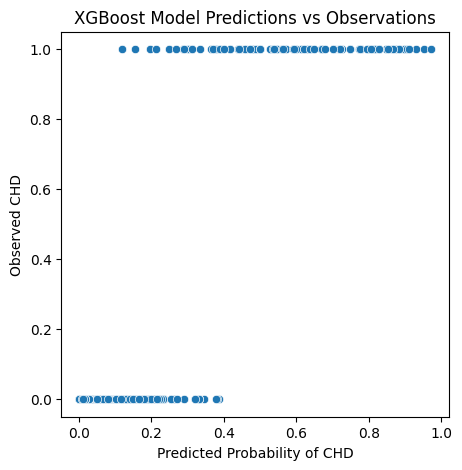

In [ ]:
# Fit the XGBoost model
model = xgb.XGBClassifier()
model.fit(X, y)

y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba > 0.15).astype(int)

# Create a scatter plot of predicted vs actual values
plt.figure(figsize=(5, 5))
sns.scatterplot(y=y_test, x=y_pred_proba)
plt.xlabel('Predicted Probability of CHD')
plt.ylabel('Observed CHD')
plt.title('XGBoost Model Predictions vs Observations')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, roc_auc_score, confusion_matrix, roc_curve, precision_score, recall_score, precision_recall_curve, classification_report, accuracy_score
from sklearn.utils import shuffle

scaled_xtest = MinMaxScaler().fit_transform(X_test)
scaled_xtestDf = pd.DataFrame(scaled_xtest,columns = X_test.columns)
scaled_xtestDf

,age,prevalentHyp,sysBP,cigsPerDay_1,BMI_1,education_1,BPMeds_1
0,0.648649,0.0,0.556180,0.40,0.344907,0.000000,0.0
1,0.540541,1.0,0.646067,0.40,0.570023,0.000000,0.0
2,0.783784,1.0,0.747191,0.00,0.482639,0.333333,0.0
3,0.108108,0.0,0.398876,0.20,0.287037,1.000000,0.0
4,0.189189,1.0,0.696629,0.80,0.673611,0.000000,0.0
...,...,...,...,...,...,...,...
651,0.189189,0.0,0.466292,0.00,0.427662,0.000000,0.0
652,0.729730,0.0,0.438202,0.06,0.502894,0.333333,0.0
653,0.297297,0.0,0.196629,0.30,0.180556,0.000000,0.0
654,0.216216,0.0,0.151685,0.10,0.387731,0.000000,0.0


In [ ]:
scaled_xtrain = MinMaxScaler().fit_transform(X_train)
scaled_xtrainDf = pd.DataFrame(scaled_xtrain,columns = X_test.columns)
scaled_xtrainDf

,age,prevalentHyp,sysBP,cigsPerDay_1,BMI_1,education_1,BPMeds_1
0,0.162162,0.0,0.274286,0.16,0.380979,0.666667,0.0
1,0.351351,1.0,0.885714,0.02,0.536860,0.666667,0.0
2,0.459459,0.0,0.194286,0.70,0.303320,1.000000,0.0
3,0.378378,0.0,0.708571,0.00,0.472707,0.000000,0.0
4,0.432432,0.0,0.182857,0.40,0.413618,0.000000,0.0
...,...,...,...,...,...,...,...
2615,0.459459,1.0,0.691429,0.60,0.507597,0.333333,0.0
2616,0.486486,1.0,0.760000,0.00,0.580754,0.000000,0.0
2617,0.567568,0.0,0.600000,0.00,0.315138,0.333333,0.0
2618,0.378378,1.0,0.885714,0.00,0.386044,0.000000,0.0


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


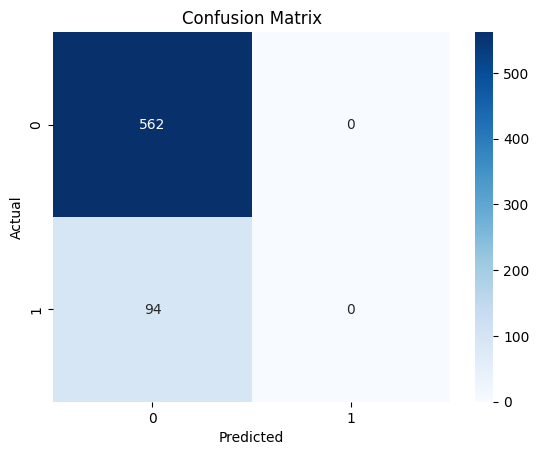

              precision    recall  f1-score   support

           0       0.86      1.00      0.92       562
           1       0.00      0.00      0.00        94

    accuracy                           0.86       656
   macro avg       0.43      0.50      0.46       656
weighted avg       0.73      0.86      0.79       656



In [ ]:
y_Spred = xgb_model.predict(scaled_xtestDf)
y_Sprob = xgb_model.predict_proba(scaled_xtestDf)[:, 1]   

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_Spred)
cr = classification_report(y_test, y_Spred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)

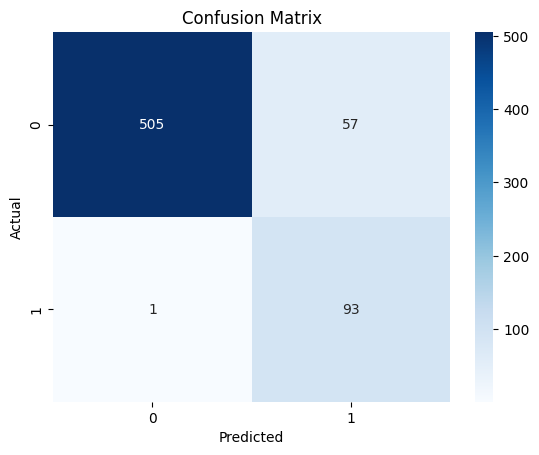

              precision    recall  f1-score   support

           0       1.00      0.90      0.95       562
           1       0.62      0.99      0.76        94

    accuracy                           0.91       656
   macro avg       0.81      0.94      0.85       656
weighted avg       0.94      0.91      0.92       656



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report

# Compute the confusion matrix and classification report of the model
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report to the console
print(cr)